# Relatório A3
Análise da base de dados do PNAD 2015.

## Instalação de pacotes

In [144]:
install.packages('ggplot2')
install.packages('ggthemes')

Warning message:
"package 'ggplot2' is in use and will not be installed"Warning message:
"package 'ggthemes' is in use and will not be installed"

## Carrega todos pacotes

In [145]:
library('ggplot2')
library('ggthemes')

## Leitura da base de dados

In [146]:
dados = read.csv('dados.csv')
head(dados)

UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
11,0,23,8,12,800,1.603808
11,1,23,2,12,1150,1.739790
11,1,35,8,15,880,1.760444
11,0,46,2,6,3500,1.783158
11,1,47,8,9,150,1.690631
11,1,34,8,12,790,1.637906


## Formatação dos gráficos

In [147]:
options(repr.plot.width = 9, repr.plot.height = 6)
formatos <- theme(
        plot.title=element_text(size = 14, hjust = 0.5),
        axis.title.y=element_text(size = 12, vjust = +0.2),
        axis.title.x=element_text(size = 12, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10)
    ) +
  theme_economist()

## Criação das categorias do dataframe

In [148]:
sexo = c(
    'Masculino', 
    'Feminino'
)
cor = c(
    'Indígena', 
    'Branca', 
    'Preta', 
    'Amarela', 
    'Parda'
)
anos_de_estudo = c(
    'Sem instrução e menos de 1 ano', 
    '1 ano', 
    '2 anos', 
    '3 anos', 
    '4 anos', 
    '5 anos', 
    '6 anos', 
    '7 anos', 
    '8 anos', 
    '9 anos', 
    '10 anos', 
    '11 anos', 
    '12 anos', 
    '13 anos', 
    '14 anos', 
    '15 anos ou mais', 
    'Não determinados'
)

uf = c(
    'Rondônia', 
    'Acre', 
    'Amazonas', 
    'Roraima', 
    'Pará', 
    'Amapá', 
    'Tocantins', 
    'Maranhão', 
    'Piauí', 
    'Ceará', 
    'Rio Grande do Norte', 
    'Paraíba', 
    'Pernambuco', 
    'Alagoas', 
    'Sergipe', 
    'Bahia', 
    'Minas Gerais', 
    'Espírito Santo', 
    'Rio de Janeiro', 
    'São Paulo', 
    'Paraná', 
    'Santa Catarina', 
    'Rio Grande do Sul', 
    'Mato Grosso do Sul', 
    'Mato Grosso', 
    'Goiás', 
    'Distrito Federal'
)

In [149]:
dados$Cat.Sexo <- factor(dados$Sexo)
levels(dados$Cat.Sexo) <- sexo

dados$Cat.Cor <- factor(dados$Cor)
levels(dados$Cat.Cor) <- cor

dados$Cat.Anos.de.Estudo <- factor(dados$Anos.de.Estudo, order = TRUE)
levels(dados$Cat.Anos.de.Estudo) <- anos_de_estudo

dados$Cat.UF <- factor(dados$UF, ordered = TRUE)
levels(dados$Cat.UF) <- uf

## Análise Renda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


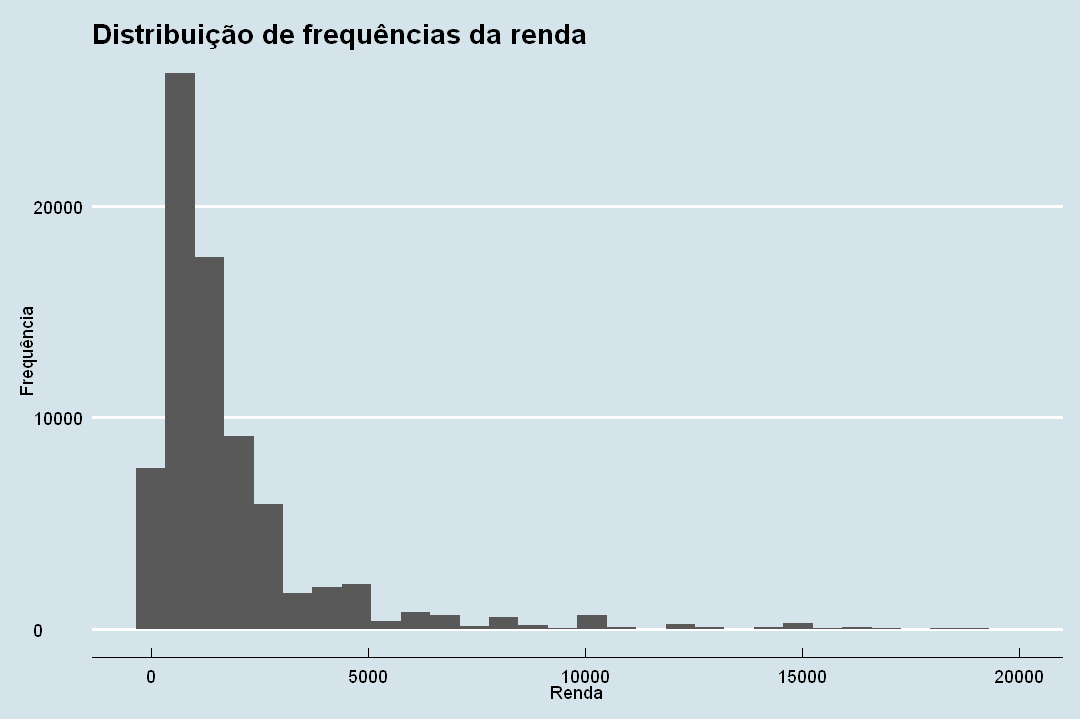

In [155]:
ggplot(data = dados[dados$Renda < 20000, ], aes(x = Renda)) +
  geom_histogram() +
  ylab('Frequência') +
  ggtitle("Distribuição de frequências da renda") +
  formatos

### Conclusões
No gráfico acima é possível observar que o gráfico é assimétrico à direita e a maior parte da renda se concentra na faixa de 1 salário mínimo. A maior parte da população possui renda entre 0 e 5000 e uma quantidade mínima da população possui renda acima de 5000.

## Análise Sexo x Cor x Renda

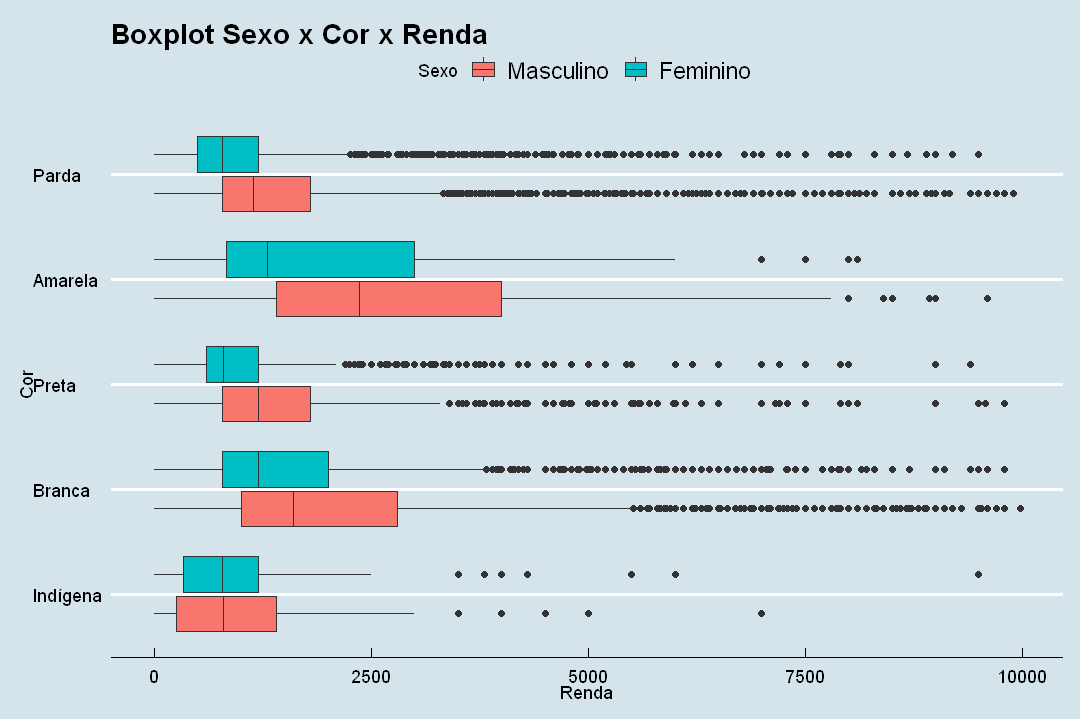

In [156]:
ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Cor, y = Renda, fill = Cat.Sexo)) +
  geom_boxplot(size = 0.2) +
  coord_flip() +
  xlab("Cor") +
  ylab("Renda") +
  ggtitle("Boxplot Sexo x Cor x Renda") +
  labs(fill = "Sexo") +
  formatos

### Conclusões
No gráfico acima podemos perceber que os indivíduos da cor amarela possuem a maior mediana de renda em ambos os sexos seguido da cor branca. O mesmo se aplica a amplitude de salário, tendo a cor amarela a maior amplitude e a cor branca a segunda maior. Na cor amarela podemos observar a maior renda, mas poucos outliers, enquanto a cor branca e parda possuem renda mediana menor porém uma quantidade grande de outliers. Em todas as cores os indivíduos do sexo masculino ganham mais do que os indivíduos do sexo feminino. As cores preta, parda e indígena possuem renda relativamente baixa comparada com as amarela e branca, sendo que a indígena também possui uma quantidade baixa de outliers.

## Análise Renda x Sexo x Anos de Estudo

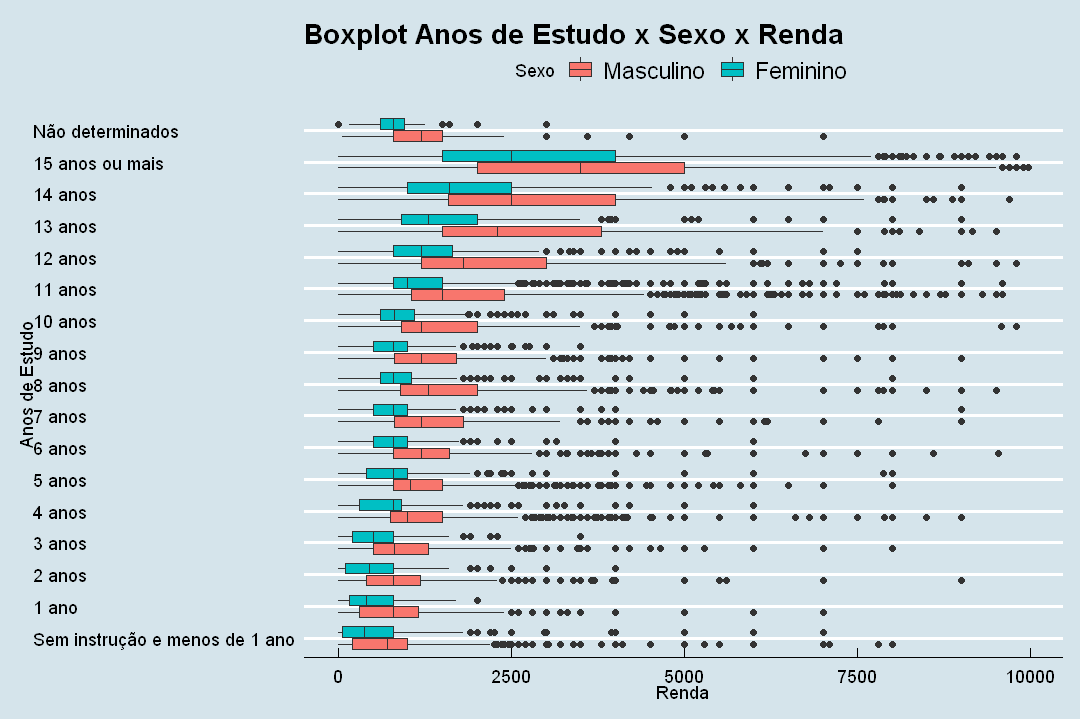

In [157]:
ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Anos.de.Estudo, y = Renda, fill = Cat.Sexo)) +
  geom_boxplot(size = 0.2) +
  coord_flip() +
  xlab("Anos de Estudo") +
  ylab("Renda") +
  ggtitle("Boxplot Anos de Estudo x Sexo x Renda") +
  labs(fill = "Sexo") +
  formatos

### Conclusões
No gráfico acima podemos observar que a renda aumenta de acordo com os anos de estudo sendo sem instrução ou menos de um ano a mediana e amplitude mais baixa e 15 anos ou mais a maior. No gráfico podemos observar que a diferença de renda considerando apenas o sexo e anos de estudo existe sendo maior para os homens em todos os casos.

## Análise Renda x UF

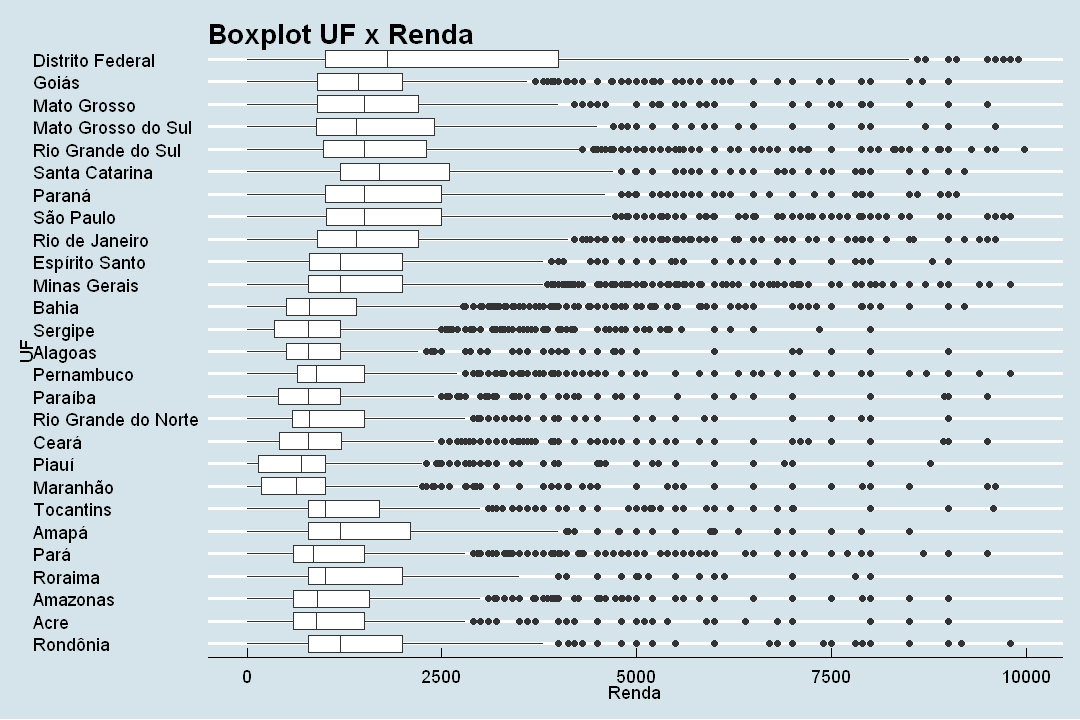

In [158]:
ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.UF, y = Renda, group = Cat.UF)) +
  geom_boxplot(size = 0.2) +
  coord_flip() +
  xlab("UF") +
  ylab("Renda") +
  ggtitle("Boxplot UF x Renda") +
  formatos

### Conclusão
No gráfico acima podemos observar que a maior renda está concentrada no Distrito Federal, tendo a maior mediana e a maior amplitude de renda de todas as outras UFs. Em seguida temos Santa Catarina e São Paulo com a maior renda e por último as UFs do Piauí e Maranhão com a menor renda.